In [4]:
#to install the package: clone and install locally
#git clone https://github.com/simomounir/GeneClassifier.git

#pip install .
# or

# only run once
#!pip install git+https://github.com/simomounir/GeneClassifier.git

In [5]:

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from geneclassifier.clf import GeneClassifier
import pandas as pd
from matplotlib import pyplot 
import pandas as pd
import io
import tarfile
import urllib.request


In [6]:
source = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00401/TCGA-PANCAN-HiSeq-801x20531.tar.gz'
tar = tarfile.open(fileobj=urllib.request.urlopen(source), mode="r|gz")
for member in tar:
    filename = member.name
    if 'data' in filename : 
        content = tar.extractfile(member).read()
        data = pd.read_csv(io.BytesIO(content), encoding='utf8')
    elif 'labels' in filename:
        content = tar.extractfile(member).read()
        labels = pd.read_csv(io.BytesIO(content), encoding='utf8')


In [7]:
X = data.drop(data.columns[0],axis=1)
Y = labels.Class
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)


In [8]:

from sklearn.decomposition import PCA
from sklearn.svm import SVC
pca = PCA(n_components=5)
lsvc_model = SVC(kernel = 'linear', random_state = 10)
GCLF = GeneClassifier(model=lsvc_model, reduction= pca)
trained = GCLF.fit(X_train,y_train)



print('train score: '+str(GCLF.score(X_train,y_train)))
print('test score:  '+str(GCLF.score(X_test,y_test)))


train score: 1.0
test score:  0.9875776397515528


/usr/local/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


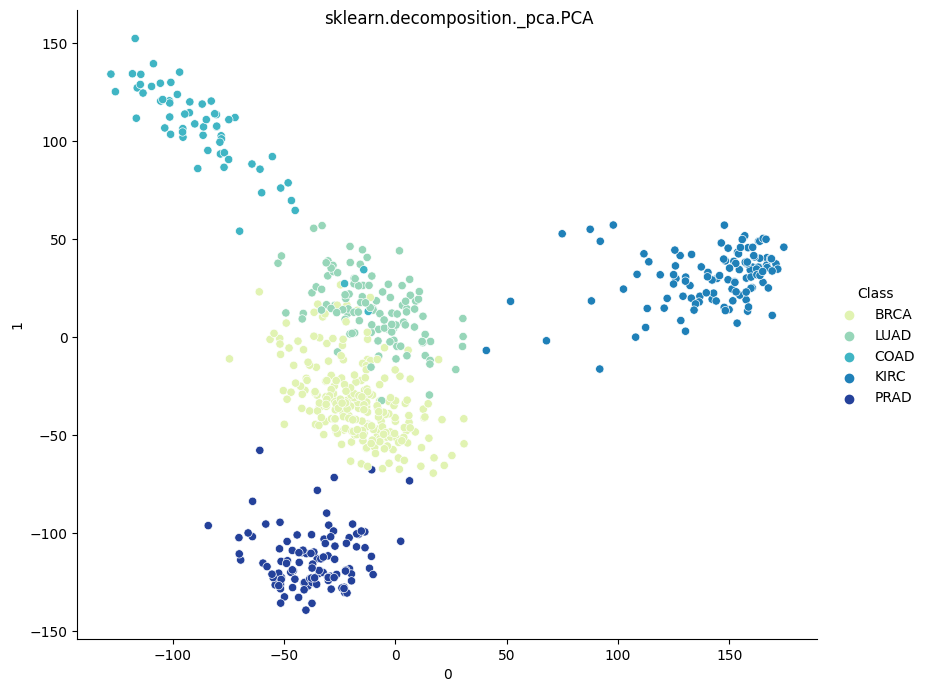

In [9]:
GCLF.plot_reduction_model()
pyplot.show()

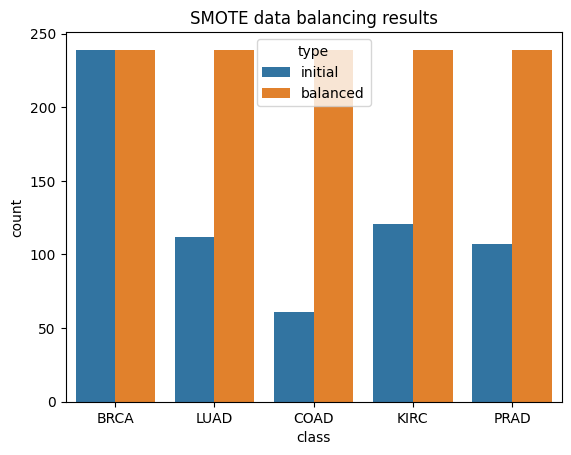

In [10]:
GCLF.plot_balancing()
pyplot.show()

In [11]:
X = data.drop(data.columns[0],axis=1)
Y = labels.Class
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42)

from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=5)
rf_model = RandomForestClassifier()
GCLF = GeneClassifier(model=rf_model, reduction= fa)
trained = GCLF.fit(X_train,y_train)


print('train score: '+str(GCLF.score(X_train,y_train)))
print('test score:  '+str(GCLF.score(X_test,y_test)))

train score: 1.0
test score:  0.9701492537313433


/usr/local/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


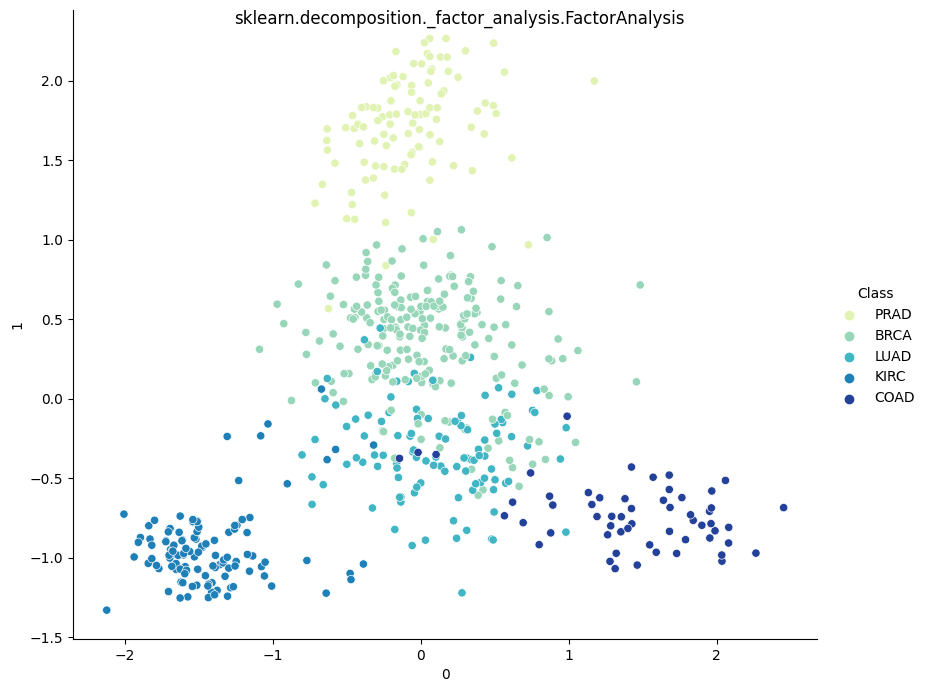

In [12]:
GCLF.plot_reduction_model()
pyplot.show()

In [13]:
parameters = {'model':(RandomForestClassifier(), SVC()), 'reduction':(PCA(n_components=3),PCA(n_components=5), FactorAnalysis(n_components=5))}
gc = GeneClassifier()

clf = GridSearchCV(gc, parameters)
clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([2.50134864, 3.20363841, 7.54150147, 2.67066765, 2.35412774,
        9.05063667]),
 'std_fit_time': array([0.59859363, 0.46200033, 1.13165755, 1.24596654, 0.28552094,
        3.15904158]),
 'mean_score_time': array([0.21519227, 0.3055676 , 0.2179985 , 0.21293035, 0.29999647,
        0.27552967]),
 'std_score_time': array([0.02403693, 0.13753364, 0.01565089, 0.01159658, 0.17768534,
        0.1101787 ]),
 'param_model': masked_array(data=[RandomForestClassifier(), RandomForestClassifier(),
                    RandomForestClassifier(), SVC(), SVC(), SVC()],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_reduction': masked_array(data=[PCA(n_components=3), PCA(n_components=5),
                    FactorAnalysis(n_components=5), PCA(n_components=3),
                    PCA(n_components=5), FactorAnalysis(n_components=5)],
              mask=[False, False, False, False, False, False],
        f

In [14]:
clf.best_params_

{'model': SVC(), 'reduction': PCA(n_components=5)}

/usr/local/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'sklearn.decomposition._pca.PCA')

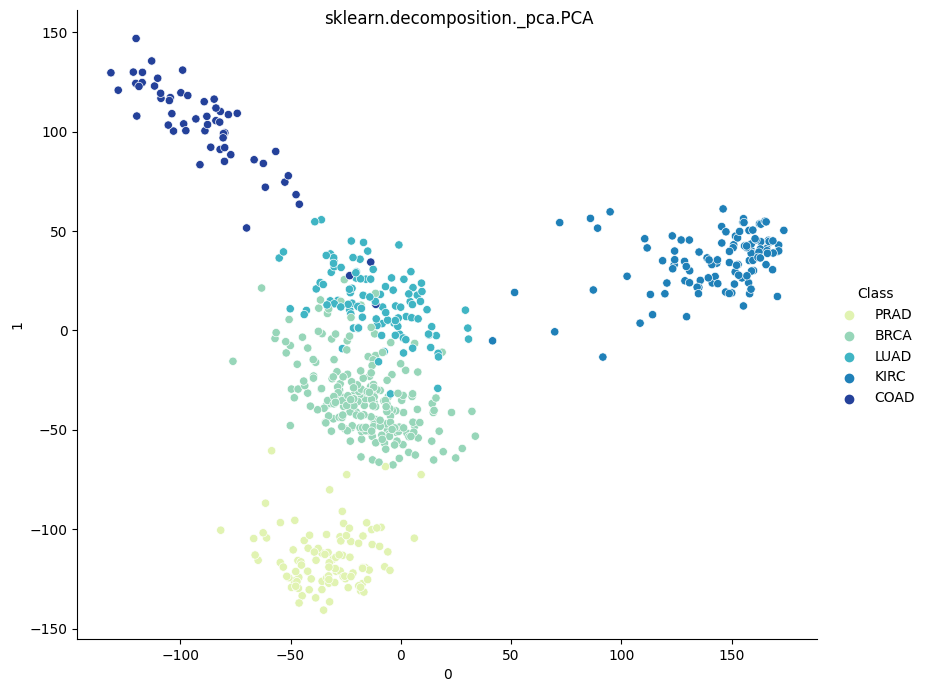

In [16]:
clf.best_estimator_.plot_reduction_model()